<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/CLASSICAL_BIT_AND_QUAMTUM_BIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMEN:**


---


Este capítulo introduce el Qubit como la unidad básica de la información y computación cuántica. Comienza revisando los bits clásicos (Cbits) y los Cbits aleatorios, y luego presenta el Qubit como una extensión algebraica del espacio de probabilidad bidimensional de un Cbit aleatorio a un vector complejo y normalizado en dos dimensiones. También se explican las dos formas principales en que un Qubit puede evolucionar: mediante operaciones unitarias (puertas cuánticas) y mediciones. Las puertas cuánticas describen la evolución en un sistema cerrado, mientras que las mediciones convierten la información cuántica en clásica al acoplar el Qubit con un instrumento de medición.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#1.BIT CLASICO ALETORIO  (RAMDOM  CBIT)
---
Podemos comenzar recordando qué significa un bit en la computación clásica. Todos hemos escuchado cómo funcionan los lenguajes discretos en las máquinas modernas, y por eso podemos imaginar un bit como un interruptor que solo puede estar en uno de dos estados posibles:

* 0 (apagado)

* 1 (encendido)

Para hacer una analogía, un bit clásico es como una moneda que solo puede mostrar cara o cruz, sin posibilidad de estar en ambos estados a la vez. Es decir, es un sistema que puede estar en dos niveles claramente distinguibles y mutuamente excluyentes, también llamados estados ortogonales.Imagine que está manipulando esta moneda en su mano y puede elegir mostrar cara o cruz; usted sabe de manera determinista cuál es el estado actual para los fines que se requieran y manipular los resultados de cada ensayo  a su antojo.

Este comportamiento binario, en el que el estado es perfectamente definido y conocido, es la base fundamental de toda la computación clásica y del procesamiento digital de información.Sin embargo, en muchos sistemas reales y aplicaciones, el estado no siempre es perfectamente definido o seguro. Por ejemplo, debido al ruido en la transmisión de datos, imperfecciones en sensores o incertidumbre inherente a ciertos procesos, no siempre podemos garantizar que el bit esté claramente en 0 o en 1.Es aquí donde surge el concepto de bits probabilísticos, que representan un bit cuyo estado no es determinista, sino que está definido por una distribución de probabilidades entre los estados 0 y 1.

Alternativamente un Cbit puede puede describirse como un estado bidimensional  llamado amplitud vectorial "one hot", El vector de amplitud one-hot contiene un único dígito "1", cuya posición indica el valor que toma el cbit. Específicamente:

* Un cbit con valor 0 se codifica mediante un vector one-hot que tiene un "1" en la primera posición.

* Un cbit con valor 1 se codifica mediante un vector one-hot que tiene un "1" en la segunda posición.

Así, la posición del "1" en el vector representa de forma clara y exclusiva el estado del cbit, se puede escribir en la notacion  de Dirac Bra-ket como se muestra en la tabla adjunta:

---

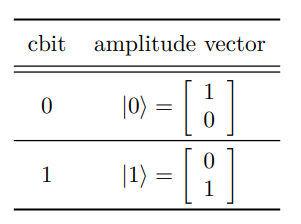 figura. 1

---

(tabla 1 :representacion de un digito binario como notacion one-hot paralelo con la notacin de dirac)


Es importante introducirnos en el estudio de la computacion cuantica, desde los formalismos matematicos, los cuales para la presente sesion nos limitaremos a las bases de la notacion Braket, importante para entender el paso de una computacion probabilistica Cbit (Clasical bits) a una cuantica  basada en Qbit (Quamtum bits).


# 2. **NOTACION DE DIRAC**
---

la notacion de Dirac puede parecer familiar para estudiantes de fisica, pero puede ser un alien para estudiantes de ingenieiria o matematicas.En matematicas un vector puede representarse como:   $\vec{a}$, en la notacion de dirac el simbolo identificador es este vector  $a$   se puede escribir dentro dentro de un 'ket',  $\ |a\rangle$ de la siguiente forma:
$$
|a\rangle = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}  \quad ecu.1
$$


acorde a la representacion de la tabla 1, la representacion del 'ket' 0 y 1 son las siguientes respectivamente:

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\quad
|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$
(estas son las bases compuacionales mas sencillas , notese que $|0\rangle$ ,
$|1\rangle$ son bases ortonormales, lo discuteremos mas adelante)

la notacion de dirac 'bra' es usada para identificar la fila y se denota de la siguiente forma:
$$
\langle a| = \begin{bmatrix} a_1 & a_2 \end{bmatrix}
$$

donde:

$$
\langle a| = |a\rangle^\dagger \quad ecu.2
$$

teniendo en  que $\dagger$ representa La operacion  hermitica transpuesta o en otras palabras  la transpuesta conjugada:

$$
(.)^\dagger = ((.)^T)^*
$$
por ejemplo para el 1 y 0:

$$
\langle 0|  = \begin{bmatrix} 1 & 0 \end{bmatrix}
\quad
\langle 1 | = \begin{bmatrix} 0 & 1 \end{bmatrix}
$$

estos vectores son en esencia complejos  dimendionalmente finitos, dado que pertenecen a los llamados espacios de Hilbert  y se denotado por $\mathcal{H}$, aqui los espacios de interes  para computacion cuantica $2^n$  en la notacion de hilbert con $n\in\mathbb{Z}^+$.

Uno puede preguntarse por qué aprender una notación nueva y aparentemente extraña para los vectores, cuando podríamos simplemente usar la representación en vectores columna.

Una razón es que la notación de Dirac suele ahorrar espacio. Especialmente al escribir vectores dispersos (que tienen pocos componentes no nulos), la notación de Dirac es mucho más compacta.

Para estados con 2 o 3 qubits, esto no es tan complicado, pero imagine escribir un estado de 8 qubits con vectores columna: tendría $2^8=256$ componentes, lo cual sería bastante engorroso.

---
#**PRODUCTOS INTERNOS**
---

En nuestro contexto, un producto interno es una función que toma dos vectores del mismo espacio y devuelve un número complejo. En el contexto de espacios vectoriales complejos, esta operación permite extender la noción del producto punto de los vectores reales, respetando ciertas propiedades algebraicas.
Se denota como:

Sean $ \mathbf{v}, \mathbf{w} \in \mathbb{C}^n $, sus componentes son números complejos.  

El producto interno complejo se define como:

$$
\langle \mathbf{v}, \mathbf{w} \rangle = \sum_{i=1}^{n} v_i^* w_i
$$

asi:

$$
\begin{bmatrix} v_1 \\ v_2\\v_3\\...\\v_n\end{bmatrix}*\begin{bmatrix} w_1 \\ w_2\\w_3\\...\\w_n\end{bmatrix} = \begin{bmatrix}  v_1^* & v_2^*& v_3^*&...&v_n^* \end{bmatrix}*\begin{bmatrix}w_1 \\ w_2\\w_3\\...\\w_n\end{bmatrix} = \sum_{i=1}^{n} v_i^* w_i
$$

donde $v_i^*$ es el conjugado complejo del componente $v_i$.Esta definición generaliza el producto punto usual al caso complejo y garantiza las siguientes propiedades:

---
### Propiedades del producto interno complejo
---

**1. Linealidad en el segundo argumento**

Para una combinación lineal de vectores $\sum_i \lambda_i w_i$, se cumple:

$$
\langle v, \sum_i \lambda_i w_i \rangle = \sum_i \lambda_i \langle v, w_i \rangle
$$

---

**2. Conjugación simétrica (conjugate-commutativity)**

El producto interno conmutado es el conjugado complejo:

$$
\langle v, w \rangle = \langle w, v \rangle^*
$$

---

**3. No negatividad**

El producto interno de un vector consigo mismo siempre es real y no negativo:

$$
\langle v, v \rangle \geq 0
$$

Y se cumple la igualdad si y solo si $v = 0$.

---

Teniendo en cuenta las propiedades anteriores, se puede definir el producto interno entre vectores del espacio de hilbert como:


$$
 |a \rangle ^†   | b \rangle = \langle a||b\rangle = \langle a|b\rangle \quad ecu.3
$$
por ejemplo:
$$
\langle1| = \begin{bmatrix} 1 & 0 \end{bmatrix}  \quad    |0\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$
$$
\langle 1|0 \rangle = \begin{bmatrix} 1 & 0 \end{bmatrix} *  \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 1 (0) + 0(1) = 0
$$


donde la ultima exprecion es conocida como BRA - KET  de dirac, usado la propiedad de conjugacion simetrica tenemos que:

$$
\langle a|b\rangle = \langle a|b\rangle  ^ *
$$

el cual represneta la oeracion del complejo conjugado.

la norma $l_2$ de un vector  en la notacion BRA - KET  de Dirac se puede escribir como:


$$
|||a\rangle||^2_2 = 1  \quad ecu.4
$$

asi tenemos la norma unitaria:

$$
\langle1|1\rangle = \begin{bmatrix} 1 & 0 \end{bmatrix}*\begin{bmatrix} 1 \\ 0 \end{bmatrix} = 1(1) + 0(0) = 1
$$



#CBIT ALEAROTIO COMO VECTOR DE PROBABILIDAD

---

Un cbit aleatorio puede representarse mediante un vector columna de dos dimensiones que contiene las probabilidades de que el bit sea 0 o 1.

$$
P= \begin{bmatrix}p_0 \\ p_1 \end{bmatrix} \quad ecu.5
$$

donde:
* $p≥0$  es la probabilidad de que el cbit valga 0,
* $p_1≥0$ es la probabilidad de que el cbit valga 1,

Se cumple que:
$$ p_0 + p_1 = 1 $$


notese , la suma de probabilidades debe ser 1 pero la norma no siempre es  1 .Ahora para obtener la probabilidad de un valor específico   $ x \in \{0, 1\} $
se realiza el producto interno de esta forma:


$$
| x \rangle ^\dagger P = \langle x|p = p_x  \quad ecu.6
$$

lo cual  significa, en otras palabras  simplemente “extraer” el valor que está en la posición  $x$  de $P$, por ejemplo:

* supongamos que:
$$
P = \begin{bmatrix} 0.3 \\ 0.7 \end{bmatrix}
$$
ahora si queremos la probabilidade de $|1 \rangle$, entonces:

$$
|x\rangle^\dagger P = |1\rangle ^ \dagger P  =  (\begin{bmatrix} 0  \\ 1\end{bmatrix}^T)^* * \begin{bmatrix}0.3\\0.7 \end{bmatrix}  =   \begin{bmatrix} 0  & 1\end{bmatrix} * \begin{bmatrix}0.3\\0.7 \end{bmatrix} =  0(0.3) + 0.7(1) = 0.7
$$

o tambien si quisieramos la probabilidad del CBIT $|0 \rangle$:

$$
|x\rangle^\dagger P = |0\rangle ^ \dagger P  =  (\begin{bmatrix} 1  \\ 0\end{bmatrix}^T)^* * \begin{bmatrix}0.3\\0.7 \end{bmatrix}  =   \begin{bmatrix} 1  & 0\end{bmatrix} * \begin{bmatrix}0.3\\0.7 \end{bmatrix} =  1(0.3) + 0.7(0) = 0.3
$$


Es decir estas proyectando el vector $P$ sobre la dirección de  $|1\rangle$  y $|0 \rangle$ como veremos en la siguiente grafica:



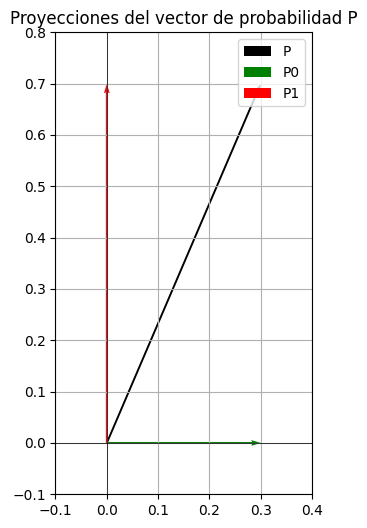

In [4]:
#ket 1 y ket 0

ket0 = np.array([1,0])
ket1 = np.array([0,1])

#Vector de probabilidad  P
P = np.array([0.3,0.7])


#medicion, devuelve la probabilidad
P_0 = np.dot(ket0,P)*ket0
P_1 = np.dot(ket1,P)*ket1

fig, ax = plt.subplots(figsize=(6, 6))

#  vectores
ax.set_title("Proyecciones del vector de probabilidad P")
ax.quiver(0,0,P[0],P[1], color = 'black', angles = 'xy', scale_units = 'xy',scale = 1, label = 'P' )
ax.quiver(0,0,P_0[0],P_0[1],color = 'green',angles='xy' , scale_units = 'xy', scale = 1, label = 'P0')
ax.quiver(0, 0, P_1[0], P_1[1], color='red', angles='xy', scale_units='xy', scale=1, label = 'P1')

# Configurar ejes

ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlim(-0.1, 0.4)
ax.set_ylim(-0.1, 0.8)
ax.set_aspect('equal')
ax.legend()
plt.show()

#El resultado es el valor de probabilidad asociado (como vemos en la gráfica).

#Reescritura como combinación lineal

---

Ya sabemos que los vectores base ortonormales son:
$$
|0 \rangle = \begin{bmatrix} 1\\0 \end{bmatrix} \quad |1\rangle = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

Entonces el vector de probabilidad puede reescribirse como:
$$
P = p_0|0\rangle + p_1|1\rangle  \quad ecu.7
$$
lo cual en resumidas cuentas, no dice   que el estado aleatorio del CBIT puede verse como una "superposición" clásica de los estados  $|0\rangle$ y $|1\rangle$,  con pesos dados por sus respectivas probabilidades. hay que tener en cuentas que Aunque se use la palabra "superposicion", esto no es mecanica cuántica todavía. Aquí se refiere solo a una combinación lineal de vectores en álgebra lineal.

por ejemplo grafiquemos la combinacion lineal  anterior la cual puede reescribirse en notacion convencional como:
$$
P = p_0|0\rangle + p_1|1\rangle = p_0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + p_1\begin{bmatrix} 0 \\ 1\end{bmatrix}   
$$
teniendo en cuenta que:

$$
P = \begin{bmatrix} 0.3 \\ 0.7\end{bmatrix}  
$$
Visualmente, el vector $P$ apunta a un punto en el plano 2D que está dentro de la  de probabilidad, es decir, el triángulo donde $p_0,p_1≥0$ y $p_0 + p_1 =1$.

visualmente lo tenemos en la siguiente grafica:

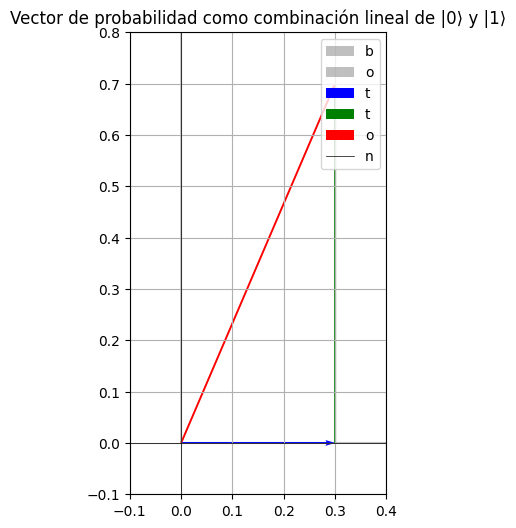

In [30]:
p0 = P[0]
p1 = P[1]

#aqui escribimos la formula anterior
p = p0*ket0 + p1*ket1                   # combinación lineal
p = p0 * ket0 + p1 * ket1

# GRFICA
fig, ax = plt.subplots(figsize=(6, 6))

#DIBUJAMOS LOS VECTORES

#BASES ORTONORMALES
ax.quiver(0, 0, ket0[0], ket0[1], angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='|0⟩')
ax.quiver(0, 0, ket1[0], ket1[1], angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='|1⟩')

#VECTORES DE LA BASE CON LA COMBINACION LINEAL
ax.quiver(0, 0, p0 * ket0[0], p0 * ket0[1], angles='xy', scale_units='xy', scale=1, color='blue', label='$p_0 |0⟩$')
ax.quiver(p0 * ket0[0], p0 * ket0[1], p1 * ket1[0], p1 * ket1[1], angles='xy', scale_units='xy', scale=1, color='green', label='$p_1 |1⟩$')
ax.quiver(0, 0, p[0], p[1], angles='xy', scale_units='xy', scale=1, color='red', label='p = $p_0|0⟩ + p_1|1⟩$')
ax.set_xlim(-0.1, 0.4)
ax.set_ylim(-0.1, 0.8)
ax.set_aspect('equal')
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title("Vector de probabilidad como combinación lineal de |0⟩ y |1⟩")
ax.legend()
plt.show()


Cabe destacar que a diferencia de un CBIT  determinista (0 o 1) el cual su valor se conoce con una unica observacion, el CBIT aleatorio se describe mediante un valor de probabilidad P, e cual indica cual es la probabilidad de el CBIT  tome el valor 0 o 1  al ser medido

se puede pensar que el CBIT probabilistico contiene mucha mas informacion, sin embargo, no es posible conocer estas probabilidades con una sola medición. Una observación del CBIT aleatorio solo produce uno de los posibles resultados (0 o 1), sin revelar la distribución subyacente. Para estimar el vector de probabilidad, se deben realizar múltiples mediciones independientes, cada una reiniciando el sistema para obtener una nueva realización del cbit.
Este proceso es análogo a lanzar muchas veces una moneda cargada (como una máquina tragamonedas): al observar la frecuencia relativa de cada resultado, podemos inferir las probabilidades reales del sistema. Esta idea es central en el estudio de variables aleatorias y refleja cómo la información contenida en un cbit aleatorio solo se revela a través del análisis estadístico de múltiples observaciones.

por ejemplo:tratemos de imaginar una máquina tragamonedas con un solo brazo que produce el dígito 0 o el 1 con probabilidades $p_0$ y $p_1$, respectivamente. Para extraer el estado del cbit aleatorio, es decir, su vector de probabilidad $P$, no basta con un simple vistazo. En su lugar, es necesario realizar múltiples mediciones del CBIT aleatorio, generando varias realizaciones independientes del cbit aleatorio.


probabilidades reales:      p0 = 0.3, p1 = 0.7
probabilidades estimadas:   p0 = 0.311,  p1  = 0.689


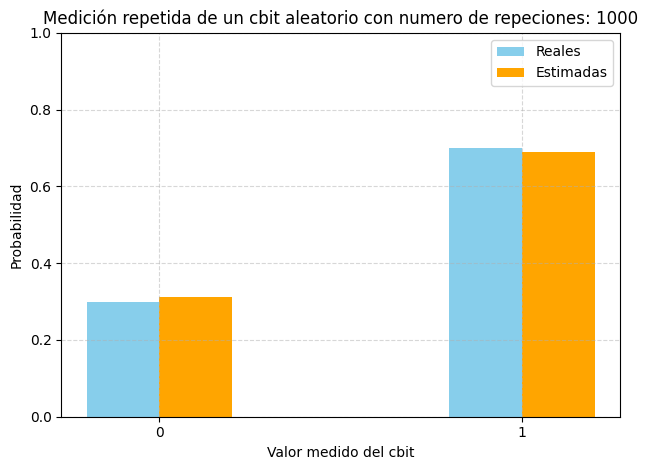

In [25]:
# con el vector P anterior
p0_real = P[0]
p1_real = P[1]
prob_vector = [p0_real, p1_real]

# numero de repeticiones

N = 1000  #por ejemplo 100, que tantos nos hacercamos a las probabilidades reales?

#usando randon choice simulamos el evento de jalar la palaca y de forma independiente obtener 1 o 0

mediciones = np.random.choice([0,1],size =N , p = prob_vector)


#conteo de resultados:
conteo_0 = np.sum(mediciones == 0)
conteo_1 = np.sum(mediciones == 1)



# probabilidades
p0_estimado = conteo_0 / N
p1_estimado = conteo_1/ N


print(f"probabilidades reales:      p0 = {p0_real}, p1 = {p1_real}")
print(f"probabilidades estimadas:   p0 = {round(p0_estimado, 3)},  p1  = {round(p1_estimado, 3)}")

#visualizacion
espacios = ['0','1']
reales = [p0_real,p1_real]
estimados = [p0_estimado,p1_estimado]

x = np.arange(len(espacios))
ancho = 0.2

fig, ax = plt.subplots()
bars1 = ax.bar(x - ancho/2, reales, ancho, label='Reales', color='skyblue')
bars2 = ax.bar(x + ancho/2, estimados, ancho, label='Estimadas', color='orange')

# Etiquetas y título
ax.set_ylabel('Probabilidad')
ax.set_xlabel('Valor medido del cbit')
ax.set_title(f'Medición repetida de un cbit aleatorio con numero de repeciones: {N}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# EL Qubit

---

El Quamtum Bit (Qubit) es un sistema  cuantico de dos niveles, es la unidad básica de información cuántica, de manera analoga al CBIT  aleatorio, Qubit  puede ser descrito por el vector de amplitud bidimencional:

$$
|\psi\rangle =\begin{bmatrix}\alpha_0 \\\alpha_1\end{bmatrix}= \alpha_0 |0\rangle + \alpha_1 |1\rangle \quad ecu.8
$$
donde $\alpha_0$ y $\alpha_1$ son en esencia numeros complejos (notese que que como son entradas complejas  incluyen entradas reales como caso especial. Es decir, recupera como casos especiales los dos estados posibles, expresados como vectores de amplitud one-hot, de un CBIT determinista)

el vector de estado tiene definida la norma unitaria como

$$
|||\psi\rangle||^2_2 = \langle \psi| \psi \rangle = |\alpha_0|^2 + |\alpha_1|^2 = 1   \quad ecu.9
$$

ademas estas propiedad diferencian sustanialmente el hecho de que las entradas de $P$  pero no la norma es igual a 1, considerando por las propiedades vistas $(ecu.4)$ que las normas de los kets son iguales a 1.

Decimos que el Qubit es en una superposicion de los estados $|1\rangle$ y $|0\rangle$  con amplitudes complejas respectivas  $\alpha_0$ y $\alpha_1$, lo que implica que el vector permanece en un espacio vectorial lineal  de dos dimecion  $\mathcal{H}^2$, ademas los estados $\alpha_0$ y $\alpha_1$ formal la base computacional del espacio de Hilber que no es mas que una interpretacion geometrica simplificada de las amplitudes reales, las cuales se pueden odservar en la figura 2.

---


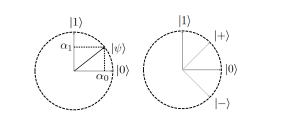
figura. 2

---

El estado de un qubit, al ser un vector en un espacio de dos dimensiones, no está limitado a expresarse únicamente en la base estándar.Es decir, puede representarse como una combinación lineal o superposición de cualquier par de vectores que sean ortogonales entre sí y que formen una base para ese espacio.

sta base está formada por dos vectores especiales, llamados
$|+\rangle$ y $|-\rangle$, el vector $|-\rangle$ es la superposición equitativa de los estados $|1\rangle$ y $|0\rangle$, es decir, un estado que representa “igual cantidad” de $|1\rangle$ y $|0\rangle $,  se expresa  matematicamente como:

$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$$
|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

Estas son llamadas bases diagonales y se  ven como la parte  derecha de la figura. 2.

Ademas la  $ecu.9$  puede reescribirse como una superposicion de  de los estados diagonales $|+\rangle$ y   $|-\rangle$ de la siguiente forma:

$$
|\psi\rangle  = \begin{bmatrix} \alpha_0 \\ \alpha_1 \end{bmatrix} = \frac{1}{\sqrt{2}}(\alpha_0 + \alpha_1)|+\rangle + \frac{1}{\sqrt{2}}(\alpha_0 - \alpha_1)|-\rangle \quad ecu.10
$$

asi las amplitudes de $|+\rangle$ es el factor de escala  
  $\frac{1}{\sqrt{2}}(\alpha_0 + \alpha_1)$  y  de   $|-\rangle$ es  $\frac{1}{\sqrt{2}}(\alpha_0 - \alpha_1)$.

---

# EJERCICIO:
1. Verificar que las bases  $|+\rangle$ y   $|-\rangle$ son ortogonales y tienen una norma unitaria.
2. demostrar que la ($ecu.10$) es esquivalente a la ($ecu.4$).

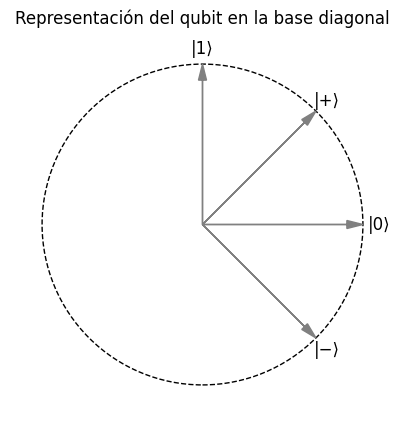

In [31]:
#IMPLEMENTACION DE LAS BASES |+⟩  y |−⟩

# definimos los angulos
angle_0 = 0                   # |0⟩  base
angle_1 = np.pi / 2           # |1⟩  base
angle_plus = np.pi / 4        # |+⟩
angle_minus = -np.pi / 4      # |−⟩

# radio
r = 1

# Coordenadas para cada vector
vectors = {
    "|0⟩": (r * np.cos(angle_0), r * np.sin(angle_0)),
    "|1⟩": (r * np.cos(angle_1), r * np.sin(angle_1)),
    "|+⟩": (r * np.cos(angle_plus), r * np.sin(angle_plus)),
    "|−⟩": (r * np.cos(angle_minus), r * np.sin(angle_minus)),
}

#GRAFICA
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
circle = plt.Circle((0, 0), r, color='black', linestyle='dashed', fill=False)
ax.add_artist(circle)

#GRAFICACION DE  VECTORES
for label, (x, y) in vectors.items():
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.1, length_includes_head=True, color='gray')
    ax.text(x * 1.1, y * 1.1, label, fontsize=12, ha='center', va='center')


ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.axis('off')
plt.title("representacion del qubit en la base diagonal")
plt.show()


# Medición de un Qubit: Mediciones de von Neumann

---

Un qubit, al igual que un bit clásico aleatorio, sólo puede ser accedido a través de mediciones. Una medición transforma el estado cuántico del qubit $|\psi\rangle$ en un bit clásico (cbit), y modifica el estado original del qubit en el proceso.

La medición más básica es la medición de von Neumann en la base computacional, también llamada medición estándar. Si el qubit se encuentra en el estado:
$$
|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle
$$

entonces la medición estándar tiene dos características fundamentales:

---

1. **Regla de Born**:

La probabilidad de observar un resultado $x\in\{0,1\}$ está dada por el valor absoluto al cuadrado del coeficiente correspondiente:

$$
Pr[medición = x] =|\alpha_x|^2
$$

Es decir, si el estado medido es $|0\rangle$, la probabilidad es $|\alpha_0|^2$, y si es $|1\rangle$, la probabilidad es $|\alpha_1|^2$.

Geometrícamente, esta probabilidad corresponde al cuadrado de la magnitud de la proyección del estado $|\psi\rangle$ sobre el vector base $|x\rangle$ En notación bra-ket, el coeficiente  $\alpha_x$ se puede escribir como:

$$
\alpha_x = \langle x|\psi\rangle
$$
y entonces:
$$
|\alpha_x |^2= |\langle x|\psi\rangle|^2
$$

---

2. **Colapso del Estado**



Después de la medición, el qubit colapsa al estado correspondiente al resultado obtenido. Es decir, si la medición da como resultado $x = 0 $, el qubit queda en el estado $|0\rangle$ ; si da $x =1 $ queda en el estado $|1\rangle. El estado posterior es completamente determinado por el resultado del proceso de medición.

La probabilidad de obtener el resultado $x$  también se puede expresar usando la matriz de densidad $\rho = |\psi\rangle\langle\psi|$
, como:

$$
|\alpha_x|^2 = \langle \psi | \rho |\psi\rangle
$$

Si el qubit ya está en uno de los estados base , la medición no cambia su estado y el resultado es determinístico. Por ejemplo, medir el estado $|0\rangle$ siempre da 0 probabilidad 1.

# ¿Es un Qubit solo un Cbit aleatorio?

---

con lo que hemos estudiado en esta breve introduccion al QML, nos lleva a pensar si en algunos contextos, especialmente cuando los coeficientes (amplitudes) de un Qubit son reales y no negativos, puede parecer que un qubit simplemente codifica una distribución de probabilidad. Por ejemplo, si un qubit se encuentra en el estado:

$$
|\psi\rangle = \sqrt{p_0}|0\rangle +\sqrt{p_1}|1\rangle
$$
A primera vista, se asemeja a un bit clásico aleatorio que toma valores 0 o 1 según una distribución de probabilidad

$$
P = \begin{bmatrix} \alpha_0 \\ \alpha_1\end{bmatrix}
$$

podriamos pensar entonces que un Qubit es simplemente un Cbit aleatorio “enmascarado”, es decir, que tiene un estado “verdadero” (0 o 1), pero desconocido hasta que lo medimos. ¡Esta interpretación es incorrecta!

Este error conceptual ignora los aspectos más profundos y distintivos de los Qubits. Aunque la regla de Born nos da las probabilidades de medición, un qubit en superposición no tiene un valor preexistente de 0 o 1: no está “oculto”, sino que el resultado de la medición se genera en el acto, colapsando el estado cuántico.

La verdadera diferencia entre un qubit y un cbit aleatorio aparece cuando analizamos cómo estos evolucionan e interactúan. Los qubits evolucionan de manera unitaria, lo que permite que sus amplitudes (como $\alpha_0$ y $\alpha_1$
) se combinen y interfieran. Esta interferencia puede alterar drásticamente las probabilidades de los resultados de mediciones futuras, algo que no puede ocurrir con un bit clásico aleatorio, cuya evolución es típicamente estocástica y sin interferencia.

